# Predicting the apparent Age and Gender using face images

# This project aims to implement:-


1) Preprocessing image

2) Perform Eigenface Analysis for Eigendecomposition and Singular Value Decomposition (SVD). Discuss their similarity and differences

3) Develop model to predict apparent age and gender using face images (SVD Processed feature) 

4) implement an Artificial Neural Network (ANN) 

5) discuss our experimental design 

<a id = "Table_of_content"></a>
# Table of content
### 1. [Import Library](#import_library)
### 2. [Data Proprocessing](#Data_Proprocessing)
### 3. [EigenFace Analyse](#Eigenface_Analyse)
### 4. [Predict apparent age and gender using face images](#Predict_apparent_age_and_gender_using_face_images)
### 5. [ANN Model](#ANN_Model)
### 6. [Comparison (Linear Regression, Linear Regression using SVD, ANN with MSE , ANN with ADAM)](#Comparison)
### 7. [Conclusion](#Conclusion)
### 8. [Our Model Prediction](#Model_Prediction)

<a id = "import_Library"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
# Import Library
For this project, we have implemented these libraries:

|library      |Functions/Usage    |
|:--|:--|
|numpy          |- uses in creating arrays |
|               |- performs operations in array.etc|
|sys            |- manipulate different parts of Python runtime environment|
|skimage        |- use in image processing (greyscale, rescaling) |
|matplotlib     |- library use for ploting |
|glob           |- an Unix style pathname expansion for python |
|os             |- library to call upon os system|
|time           |- access time in system | 
|pandas         |- open source data analysis and manipulation tool |
|sklearn        |- library for model selection |



In [1]:
#import all library used in the assignment 
import numpy as np
from time import time
import sys
from skimage import color
from skimage.transform import rescale 
from matplotlib import image
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd
from numpy import linalg as LA #Linear Algebra
from sklearn.model_selection import train_test_split #Spliting data into training set and test set
from sklearn.metrics import mean_squared_error,accuracy_score # Calculating the MSE with sklearn
# insert other library here

<a id = "Data_Proprocessing"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
# Data Preprocessing
this section preprocess data from https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/

Note: 
After checking , we found out that "61_3_20170109150557335.jpg.chip.jpg" contains an error thats its second value contains a "3"
The following image can lead to an missing data in the dataset.
Thus, we decided to remove this data from the dataset

Another solution is to add it to 62_1_.......jpg 

3
Got issue.
The number of data read from the file is 9780
Age of individuals present in the images ranges between 1 to 110
There is 4372 of Male present in the dataset and 5407 Female present in the dataset

Below are some examples: 


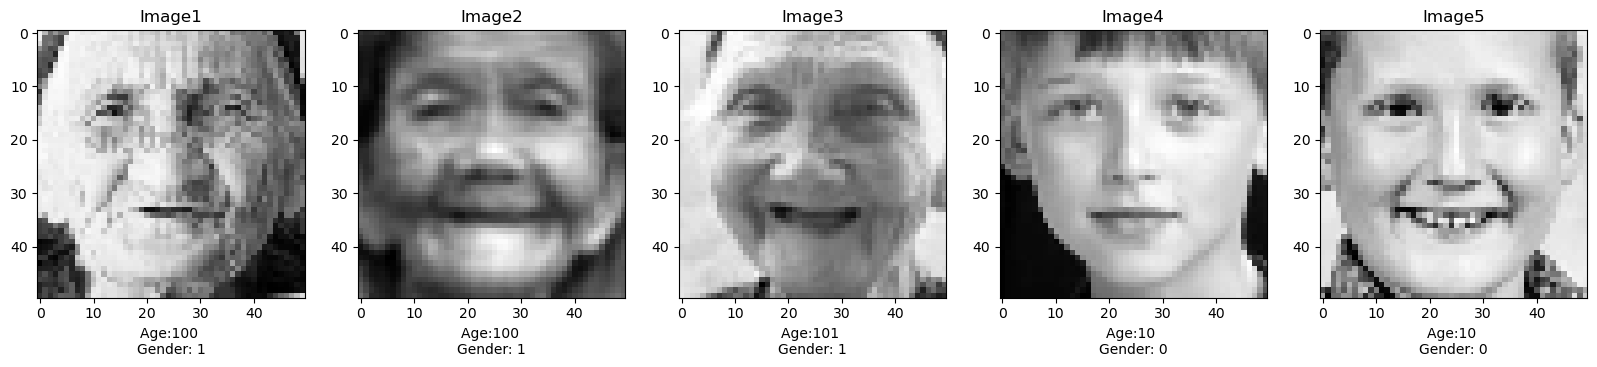

In [2]:
# set up two arrays to store the faces and the age of respective face image
Face = []
Age = []
Gender = []
Male = 0
Female = 0
T_data = 0
k = 0
_,ax = plt.subplots(1,5,figsize= (20, 4))

# show the image of the resized image
for i in glob.glob(r"FaceData\*"): # change different for everyone
    f_image = image.imread(i) #load 1 image from the FaceData Directory
    f_image = color.rgb2gray(f_image) #convert it from color to greyscale image
    f_image_rescale = rescale(f_image, 0.25, anti_aliasing = False)
    
    # times 0.25 cause initial image is 200x200
    
    Face.append(f_image_rescale.flatten()) 
    Age.append(int(os.path.basename(i).split("_")[0]))
    Gender.append(int(os.path.basename(i).split("_")[1]))
    T_data += 1 
    
    # show the first 5 faces images
    if k < 5:
        ax[k].imshow(f_image_rescale, cmap = 'gray')
        ax[k].set_title(f"Image{k+1}")
        ax[k].set_xlabel(f"Age:{Age[k]} \nGender: {Gender[k]}")
        k += 1

# Show number of male and female in the dataset
for j in range(len(Gender)):
    if Gender[j] == 0:
        Male += 1
    elif Gender[j] == 1:
        Female += 1
    else:
        print(Gender[j])
        print(f"Got issue.")

print(f"The number of data read from the file is", T_data)
print(f"Age of individuals present in the images ranges between {np.min(Age)} to {np.max(Age)}")
print(f"There is {Male} of Male present in the dataset and {Female} Female present in the dataset")

print("\nBelow are some examples: ")

Printing Gender here to check if we have successfully obtain an list containing 0s and 1s

In [3]:
print(Gender)

[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# In the code below, we will set:

D as our dataset <br >

y as the Age of Dataset image (transform into float value between 0 and 1)<br >
To transform the data, the formula:
$\displaystyle \frac{Age}{Max Age}$<br >
will be used

Example: <br >
$\displaystyle \frac{72.0}{100.0} = 0.655$ <br >
<br >
The answer will be in float type (decimal
<br >

z will be our Gender in Dataset, which will only contains 0 and 1 <br >
For the later computation, these data needs to be in the forms of -1s and 1s. <br >
# Note that, in “Gender”，
0 is Male<br >
1 is Female<br >

# To transform the data, we will be using the formula,
$2(Gender)-1 $, <br >

From this equation, we can make the values in Gender into -1 and 1 only. <br >
After that, we will print the shape of the list for debugging/checking purpose.

In [4]:
max_Age = np.max(Age) # get the biggest age in the dataset
np.set_printoptions(threshold=sys.maxsize)

D = np.array(Face).astype(float) #declare variable D as a float type
y = np.array(Age).astype(float)/max_Age # resize y into 0 ~ 1 

# for gender we can use # x1 = 2*(x - min(x)) / ( max(x) - min(x)) - 1
# where -1 = Male (0 in initial data)
# 1 = Female (1 in initial data)

z = 2*(np.array(Gender).astype(float))-1
# print(z)

#check the if z is -1 , 1 

# for i in range(len(z)):
#     if z[i] == -1:
#         print("yes")
#     elif z[i] == 1:
#         print(" ")
#     else:
#         print("?")

#double confirm the size of the dataset is correct
print(f"The shape of Dataset is ",D.shape)
print(f"The shape of Age in dataset is ",y.shape)
print(f"The shape of Gender in datset is", z.shape)

The shape of Dataset is  (9780, 2500)
The shape of Age in dataset is  (9780,)
The shape of Gender in datset is (9780,)


the z dataset will be printed to double check the values

In [5]:
print(z)

[ 1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1

# Splitting the dataset into training and testing
The dataset will be split into two dataset
* training dataset
* testing dataset

# Why do we split the dataset into 90% train and 10% test? 
There is mainly due to the size of our dataset. Based on our description above, we can obtain informations of our dataset. <br>
Our dataset only have  __total of 9779 instances__. To obtain a better result, most data instances should be use to train the model. 

# To obtain fixed result, we have fix the random state as 205

In [6]:
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(D, y, z, test_size=0.1, shuffle = False,random_state=205)

# print the data to check the number of data instance in both training and testing set
print("After the separation of 90% train and 10% test: \nx_train has", x_train.shape, ", y_train has", y_train.shape, ", z_train has", z_train.shape, "\nx_test has", x_test.shape, ", y_test has", y_test.shape,", z_test has",  z_test.shape)

After the separation of 90% train and 10% test: 
x_train has (8802, 2500) , y_train has (8802,) , z_train has (8802,) 
x_test has (978, 2500) , y_test has (978,) , z_test has (978,)


<a id = "Eigenface_Analyse"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
# EigenFace Analyse 
    
Eigenface is a name given to a set of eigenvectors when it is used in computer vision problems of human face recognition. <br>

This approach of using eigenfaces for face recognition were developed by Sirovich and Kirby. <br>

The Eigenface technique is using the space of images (face images) to project them as low demensional representation of face images. <br >
 
Using Principal Component Analysis (PCA), we can use a cpllection of face images to form a set of basis features. The determined principal components can be used to recosntruct an input image and classify a face as an element.

<a id = "Eigendecomposition_Vs_Singular_Decomposition(SVD)"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
# Eigendecomposition Vs Singular Decomposition（SVD）

Consider the formula of Eigendecompositon $A = PDP^{-1}$ and the formula of Singular Value Decomposition(SVD) SVD $A=UΣV^{T}$

| Description | Eigendecompostion | SVD |
| :--- | :--- | :--- |
|Properties| The Vector Matrix, $P$ are not necessarily orthogonal, thus, the change of basis can be rotation |The vectors $U$ and $V$ are orthonormal, so they can perform rotations |
|-|Matrix $P$ and $P^{-1}$ are inverse of each other|$U$ and $V$ are not necessarily inverse of each other |
|-|D can be any complex number|The entries in the diagonal matrix Σ arre real and positive value |
|-|Can only exist in square matrix due to its formula |Can be both rectangular or square matrix |
|Theory |SVD says for any linear map, there is an orthonormal frame in the domain such that it is first mapped to a different orthonormal frame in the image space, and then the values are scaled.|Eigendecomposition says that there is a basis, it doesn't have to be orthonormal, such that when the matrix is applied, this basis is simply scaled.<br><br> Assuming we have  𝑛 linearly independent eigenvectors of course. In some cases your eigenspaces may have the linear map behave more like upper triangular matrices. (not sure)|
Eigenface|The column of P is the Eigenface |The row of Vt is the Eigenface |

<a id = "Eigendecomposition"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
# Eigendecomposition

Eigendecomposition, also known as matrix diagonalization aims to  perform a matrix decomposition of a square matrix into eigenvalues and eigenvectors.

The eigenvectors are derived from the covariance matrix over high-dimensional vectie space of face images. Yhe eigenvectors will form a basis set of images that can use to constrcut covaruance matrix which can define a new coordinate system:
* Egenvectors with the largest eigenvalue has the most variation among the training vectors $x$<br>
* Eigenvectors with the smallest eigenvalue has the least variation <br>
* Thus, the eigenvector formed can be derived as (principle component/eigenface)

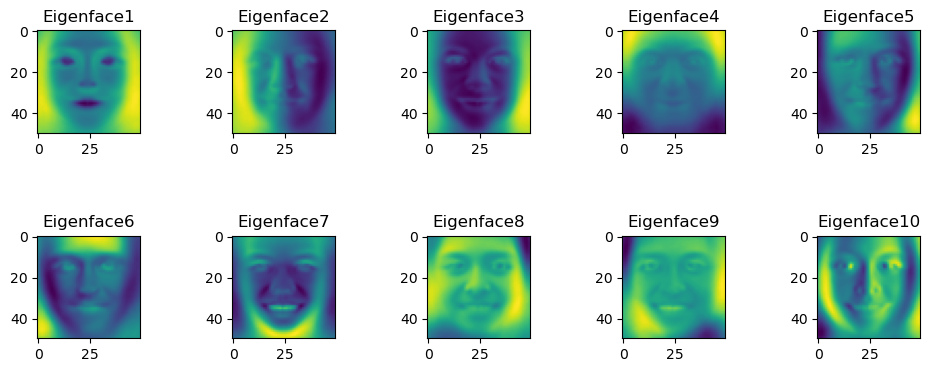

In [7]:
#Eigenfaces Analysis
data=np.abs(x_train) 
imgs = data/255-np.mean(data/255,axis=0)
C = np.cov(imgs.T) # Estimate a covariance matrix

# this part of the code perform the eigendecomposition
e_values, e_vectors = LA.eig(C) # Compute the eigenvalues and right eigenvectors 
e_vectors = np.real_if_close(e_vectors, tol=1)
E_Vectors = np.array([x for _,x in sorted(zip(e_values,e_vectors.T),reverse=True)]).T

# plot the image using subplots
# The aim is to compare eigenfaces between Eigendecomposition and SVD
_, ax  = plt.subplots(2, 5, figsize = (12,4))
plt.subplots_adjust(wspace = 0.3, hspace = 1.0)

for i in range(0,10):
    ax[i // 5, i % 5].imshow(E_Vectors[:, i].reshape((50,50)))
    ax[i // 5, i % 5].set_title(f"Eigenface{i+1}")

<a id = "Singular_Value_Decomposition(SVD)"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
# Singular Value Decomposition (SVD)
SVD can refactors the images into three different matrices, U S and VT. U and VT are known as singular vector and entry in Σ are singular values 

(2500, 2500)


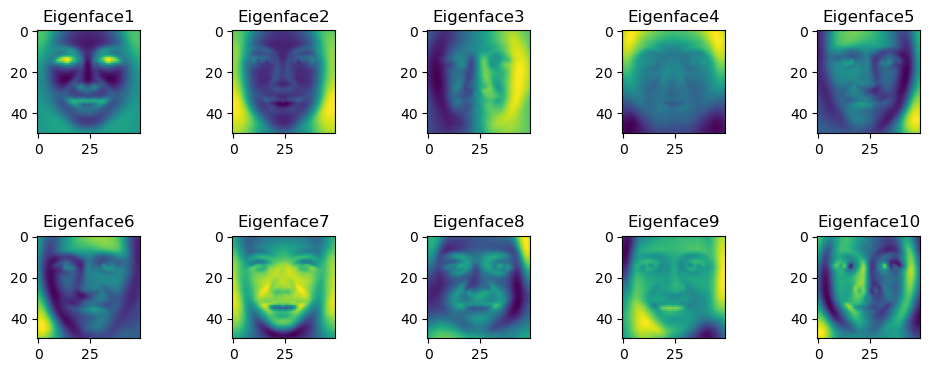

In [8]:
#SVD
U, S, V = np.linalg.svd(x_train) 
e_values_sq = S/x_train.shape[0]**0.5
print(V.shape)
# Reconstruction of the image
k = 50 #n_components

#matrix approximation 
mat_approx = U[:, :k]@ np.diag(S)[:k, :k] @ V[:k, :] #Left Singular Vectors: U, Singular Values: np.diag(S), Right Singular Vectors: V


# Comparing eigenfaces between Eigendecomposition and SVD
_, ax  = plt.subplots(2, 5, figsize = (12,4))
plt.subplots_adjust(wspace = 0.3, hspace = 1.0)

for i in range(0,10):
    ax[i // 5, i % 5].imshow(V.T[:, i].reshape((50,50)))
    ax[i // 5, i % 5].set_title(f"Eigenface{i+1}")

<a id = "Discussion_on_similarity_and_difference"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
# Dicsussion on similarity and difference
|Similarity|Difference|
|:--|:--|
|For both Eigen decomposition and SVD have produce similar faces |For Eigen decomposition, we are required to obtain the mean centered data of the image using $D – mean$.  <br>|
|Example, Eigenface 4,5,6,9 |After that, we calculate the covariance matrix and obtain the eigenvalue and eigenvectors.|
|This is because both equations are methods to reduce high dimensional images in dataset while retaining as many features in the data.|For SVD, we use $D^{T}D$ to obtain the eigenvalue and eigenvectors.|
| Thus, it is possible for them to obtain similar eigenfaces.||


<a id = "Preprocessing_for_SVD"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
# Preprocessing for SVD processed features
In this section, we will preprocess the dataset for step 5 - develop model using SVD process feature <br>
* Step 1: calculate the mean of the dataset 
* Step 2: Demean the dataset (x_train - x_train_mean)
* Step 3: Whittening the dataset 
> Note: Whitening is a data pre-processing step. It can be used to remove correlation or dependencies between features in a dataset. <br>


In [9]:
x_train_mean = np.mean(x_train,axis=0)[None,:]
x_train_mean

array([[0.37127741, 0.36263669, 0.36096294, 0.36449898, 0.37270369,
        0.38596766, 0.40205723, 0.42337216, 0.44651947, 0.47166529,
        0.49345762, 0.51430602, 0.53222653, 0.55000571, 0.56486267,
        0.58011534, 0.59218018, 0.60319766, 0.61022895, 0.61702323,
        0.62171274, 0.62518914, 0.62781452, 0.62974435, 0.63104752,
        0.6314191 , 0.62962714, 0.62609907, 0.62342966, 0.61942849,
        0.61546835, 0.60854622, 0.60012799, 0.58776574, 0.57473973,
        0.5590062 , 0.5431435 , 0.5240622 , 0.50556844, 0.48213488,
        0.45993721, 0.4355332 , 0.41202437, 0.39133974, 0.37621584,
        0.36613872, 0.36166329, 0.36094676, 0.36593204, 0.37463425,
        0.36871269, 0.36176094, 0.36040356, 0.36550038, 0.37613199,
        0.39164295, 0.40998051, 0.43315273, 0.45783361, 0.48255942,
        0.5030899 , 0.52302186, 0.54015256, 0.55686341, 0.57124873,
        0.58606027, 0.59816938, 0.60832665, 0.61590271, 0.62288559,
        0.62730998, 0.63136413, 0.63334736, 0.63

In [10]:
# Demean
x_train_demean = x_train - x_train_mean
x_test_demean = x_test - x_train_mean

# whitening and whitten reduced

In [11]:
x_train_whitten = x_train_demean@V.T@np.linalg.inv(np.diag(e_values_sq))
x_test_whitten = x_test_demean@V.T@np.linalg.inv(np.diag(e_values_sq))

In [12]:
k = 100
x_train_whitten_reduced = x_train_demean@V.T[:,:k]@np.linalg.inv(np.diag(e_values_sq[:k]))
x_test_whitten_reduced = x_test_demean@V.T[:,:k]@np.linalg.inv(np.diag(e_values_sq[:k]))

# Linear Regression
<a id = "Predict_apparent_age_and_gender_using_face_images"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
## Predict apparent age and gender using face images
For this question, we have choose to apply Closed Form Solution with/without regularization parameter(λ) from our lecture

The formula for closed form solution is: <br> 
$W = (D^TD+λI)^{-1}D^Ty $ <br> 

For better visualization, we will design an experiment to find out the most suitable model to run the dataset. <br>

The aim to create an experiment here to figure out the purpose and usage of SVD in Closed Form Solution and how does it affect our results. <br>

Before we continued in this section, we need to know that:
- Predicting Age is a regression problem. Thus, we should focus on Mean Squared Error (MSE)
- Predicting Gender is a classfication problem (only two output will be given). Thus, we should focus on accuracy score

In [13]:
Lambda_tuple = [50,100,150,200,300] # define possible lambda values
l = []

for i in Lambda_tuple:
    Lambda = i
    start_time = time.time()
    D = np.hstack([np.ones((x_train.shape[0],1)),x_train])

    DTD = np.matmul(D.T, D)

    DTD_inv = np.linalg.inv(DTD + Lambda*np.eye(D.shape[1]))

    DTD_inv_DT = np.matmul(DTD_inv,D.T)

    W_c = np.matmul(DTD_inv_DT,y_train) 
    
    y_pred = np.hstack([np.ones((x_train.shape[0],1)),x_train])@W_c
    mse = mean_squared_error(y_train,y_pred)
    print("Lambda: ",i,"train=",mse)
    y_pred_lin = np.hstack([np.ones((x_test.shape[0],1)),x_test])@W_c
    mse_y_pred_lin = mean_squared_error(y_test,y_pred_lin)
    l.append(mse_y_pred_lin)
    print("Lambda: ",i,"test=",mse_y_pred_lin)
    print(f"Time taken to compute = {np.round(time.time()-start_time,2)} second")
    print("\n")
    
min_l = min(l)
print(min_l)

Lambda:  50 train= 0.013538395049072874
Lambda:  50 test= 0.06619270851423249
Time taken to compute = 1.59 second


Lambda:  100 train= 0.014649197127761056
Lambda:  100 test= 0.06912645058425741
Time taken to compute = 1.75 second


Lambda:  150 train= 0.015418004510377989
Lambda:  150 test= 0.07147219336243078
Time taken to compute = 1.71 second


Lambda:  200 train= 0.016024715727337133
Lambda:  200 test= 0.07345452338089524
Time taken to compute = 1.8 second


Lambda:  300 train= 0.016966102516696713
Lambda:  300 test= 0.07672228852746442
Time taken to compute = 1.66 second


0.06619270851423249


In [14]:
g = []
for i in Lambda_tuple:
    start_time = time.time()
    Lambda = i
    D = np.hstack([np.ones((x_train.shape[0],1)),x_train])

    DTD = np.matmul(D.T, D)

    DTD_inv = np.linalg.inv(DTD + Lambda*np.eye(D.shape[1]))

    DTD_inv_DT = np.matmul(DTD_inv,D.T)

    W_c = np.matmul(DTD_inv_DT,z_train) 


    z_pred = np.hstack([np.ones((x_train.shape[0],1)),x_train])@W_c
    acc = accuracy_score(np.sign(z_train),np.sign(z_pred))
    print("Lambda: ",i,"train =",acc)
    z_pred_lin = np.hstack([np.ones((x_test.shape[0],1)),x_test])@W_c
    acc_z_pred_lin = accuracy_score(np.sign(z_test),np.sign(z_pred_lin))
    g.append(acc_z_pred_lin)
    print("Lambda: ",i,"test =",acc_z_pred_lin)
    print(f"Time taken to compute = {np.round(time.time()-start_time,2)} second") 
    print("\n")
    
max_gl = max(g)
print(max_gl)

Lambda:  50 train = 0.8429902294932969
Lambda:  50 test = 0.6687116564417178
Time taken to compute = 1.7 second


Lambda:  100 train = 0.8325380595319246
Lambda:  100 test = 0.6666666666666666
Time taken to compute = 1.8 second


Lambda:  150 train = 0.8246989320608953
Lambda:  150 test = 0.66359918200409
Time taken to compute = 1.64 second


Lambda:  200 train = 0.8204953419677347
Lambda:  200 test = 0.66359918200409
Time taken to compute = 1.7 second


Lambda:  300 train = 0.8137923199272893
Lambda:  300 test = 0.6584867075664622
Time taken to compute = 1.6 second


0.6687116564417178


# Simple conclusion on the linear regression

> Based on observation, we can conclude that the bigger the lambda, the longer the time taken to compute.

> The lower lambda value,lower mean sqaured error and the higher accuracy of Gender Prediction. 

# Among the 5 values we tested ,we can found out that 50 is the best hyperparameter for linear regression.

# Linear Regression using SVD
For this SVD, we will be using the whitening reduced dataset to perform the SVD Processed feature

In [15]:
Lambda_tuple = [50,100,150,200,300] # define possible lambda values
svd = []

for i in Lambda_tuple:
    start_time = time.time()   
    Lambda = i
    D = np.hstack([np.ones((x_train_whitten_reduced.shape[0],1)),x_train_whitten_reduced])

    DTD = np.matmul(D.T, D)

    DTD_inv = np.linalg.inv(DTD + Lambda*np.eye(D.shape[1]))

    DTD_inv_DT = np.matmul(DTD_inv,D.T)

    W_c_s = np.matmul(DTD_inv_DT,y_train) 
    
    y_pred = np.hstack([np.ones((x_train_whitten_reduced.shape[0],1)),x_train_whitten_reduced])@W_c_s
    mse = mean_squared_error(y_train,y_pred)
    print("Lambda: ",i,"train=",mse)
    y_pred_svd = np.hstack([np.ones((x_test_whitten_reduced.shape[0],1)),x_test_whitten_reduced])@W_c_s
    mse_y_pred_svd = mean_squared_error(y_test,y_pred_svd)
    svd.append(mse_y_pred_svd)
    print("Lambda: ",i,"test =",mse_y_pred_svd)
    print(f"Time taken to compute (Age) = {np.round(time.time()-start_time,2)} second")
    print("\n")    
    
min_svd = min(svd)
print(min_svd)

Lambda:  50 train= 0.018691768532571977
Lambda:  50 test = 0.07519921008678387
Time taken to compute (Age) = 0.04 second


Lambda:  100 train= 0.01871676219611474
Lambda:  100 test = 0.07581957198216999
Time taken to compute (Age) = 0.01 second


Lambda:  150 train= 0.018747618323143058
Lambda:  150 test = 0.07642379141312837
Time taken to compute (Age) = 0.01 second


Lambda:  200 train= 0.018782193961523048
Lambda:  200 test = 0.07701593132720842
Time taken to compute (Age) = 0.02 second


Lambda:  300 train= 0.018860491158849666
Lambda:  300 test = 0.07817523971946272
Time taken to compute (Age) = 0.01 second


0.07519921008678387


In [16]:
g_svd = []

for i in Lambda_tuple:
    Lambda = i
    D = np.hstack([np.ones((x_train_whitten_reduced.shape[0],1)),x_train_whitten_reduced])

    DTD = np.matmul(D.T, D)

    DTD_inv = np.linalg.inv(DTD + Lambda*np.eye(D.shape[1]))

    DTD_inv_DT = np.matmul(DTD_inv,D.T)

    W_c_s = np.matmul(DTD_inv_DT,z_train) 


    z_pred = np.hstack([np.ones((x_train_whitten_reduced.shape[0],1)),x_train_whitten_reduced])@W_c_s
    acc = accuracy_score(np.sign(z_train),np.sign(z_pred))
    print("Lambda: ",i,"train =",acc)
    z_pred_svd = np.hstack([np.ones((x_test_whitten_reduced.shape[0],1)),x_test_whitten_reduced])@W_c_s
    acc_z_pred_svd = accuracy_score(np.sign(z_test),np.sign(z_pred_svd))
    g_svd.append(acc_z_pred_svd)
    print("Lambda: ",i,"test =",acc_z_pred_svd)
    print(f"Time taken to compute = {np.round(time.time()-start_time,2)} second")
    print("\n")
    
max_g = max(g_svd)
print(max_g)

Lambda:  50 train = 0.7940240854351284
Lambda:  50 test = 0.6380368098159509
Time taken to compute = 0.04 second


Lambda:  100 train = 0.7941376959781867
Lambda:  100 test = 0.6380368098159509
Time taken to compute = 0.06 second


Lambda:  150 train = 0.7936832538059532
Lambda:  150 test = 0.6390593047034765
Time taken to compute = 0.07 second


Lambda:  200 train = 0.7936832538059532
Lambda:  200 test = 0.6400817995910021
Time taken to compute = 0.08 second


Lambda:  300 train = 0.7934560327198364
Lambda:  300 test = 0.6431492842535788
Time taken to compute = 0.1 second


0.6431492842535788


# Simple Conclusion on the Linear Regression using SVD processed feature
When we compare this model to our linear regression model, we can spot some difference.<br >

One of the most significant differences will be: <br>
* the time taken to compute the model. Linear Regression using SVD processed feature quicker. 

In our features normalization part,we calculate the mean of the features first.This step is to center the data around the zero and remove the bias.Then we compute demean by substarct mean of features.Demean can ensure the data are around the zero and also handle bias removing.After that, we want to increase more performance of model then we let all the features in a similar scale by whitenning.
Target of those steps is to normalize the features by center data,remove bias, scaling features and ensure the models are not overfitting.This is the reason why time taken of linear regression using SVD decrease from 2 seconds to 0.1 seconds.


<a id = "ANN_Model"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
# ANN(SGD and ADAM)

In [17]:
n_hidden_layer = 3 # number of hidden neuron in the hidden layer

W_hidden_s_a = np.random.randn(n_hidden_layer,x_train_whitten_reduced.shape[1]+1)#/100 #weight in the hidden layer
W_hidden_s_a[:,-1] = 0 # set the initial weight for the bias to be zero

W_output_s_a = np.random.randn(1,n_hidden_layer+1)#/100 #weight in the output layer
W_output_s_a[:,-1] = 0 # set the initial weight for the bias to be zero




A prediction function will be written and used in both SGD and ADAM <br>
In the prediction function,
sigmoid function,

$\displaystyle \frac{1}{1 + \exp(-y)}$<br >

Both model will be using the whitten_reduced dataset for better efficiency

# SGD Age

In [18]:
#Prediction Function(age)
def predict(X, W_hidden_s_a,W_output_s_a):
    
    y_pred = []
    for i in range(X.shape[0]):
        x_i = X[i:i+1]
        x_i_1 = np.hstack([x_i,[[1]]])
        x_h_i = sigmoid(W_hidden_s_a@x_i_1.T)
        x_h_i_1 = np.vstack([x_h_i,[1]])
        x_o = W_output_s_a@x_h_i_1
        y_pred.append([x_o[0][0]])
        
    return np.array(y_pred),x_h_i_1,x_i_1


def sigmoid(y):
    return 1/(1+np.exp(-y))

learning_rate = 0.01 

In [19]:
age = []

for e in range(30): # for each epoch
    for i in range(x_train_whitten_reduced.shape[0]):
        x_i = x_train_whitten_reduced[i:i+1]
        y_i = y_train[i]
        x_i_1 = np.hstack([x_i,[[1]]])
        x_h_i = sigmoid(W_hidden_s_a@x_i_1.T)
        x_h_i_1 = np.vstack([x_h_i,[1]])
        x_o = W_output_s_a@x_h_i_1
        delta_k = y_i - x_o
        
        #Gradient for output layer
        Gradient_output  = -delta_k*x_h_i_1.T
        
        # Gradient Descent rule
        W_output_s_a = W_output_s_a -  learning_rate*Gradient_output

        delta_h = x_h_i_1*(1-x_h_i_1)*W_output_s_a.T*delta_k
        
        # Update each hidden unit
        for k in range(W_hidden_s_a.shape[0]):
            
            #Gradient for hidden layer
            Gradient_hidden =  - delta_h[k] * x_i_1
            
            # Gradient Descent rule
            W_hidden_s_a[k,:] = W_hidden_s_a[k,:] -  learning_rate * Gradient_hidden
            
    
    
    #AGE
    y_pred,_,_ = predict(x_train_whitten_reduced, W_hidden_s_a, W_output_s_a)
    age.append(mean_squared_error(y_train,y_pred))

In [20]:
print("MSE of age")
age

MSE of age


[0.2241831664213851,
 0.22418943969565863,
 0.22419568293196354,
 0.2242018987447333,
 0.2242080875858599,
 0.2242142498680756,
 0.22422038596723667,
 0.22422649622482005,
 0.22423258095115514,
 0.22423864042940733,
 0.22424467492034608,
 0.22425068466788603,
 0.22425666990541568,
 0.22426263086290457,
 0.22426856777476062,
 0.2242744808884019,
 0.22428037047347274,
 0.2242862368316212,
 0.22429208030670117,
 0.22429790129524627,
 0.2243037002570015,
 0.2243094777252701,
 0.2243152343167698,
 0.22432097074067206,
 0.22432668780643616,
 0.22433238643005374,
 0.2243380676382892,
 0.22434373257053122,
 0.22434938247790778,
 0.22435501871938968]

In [21]:
#Result of test Set
y_pred_SGD,_,_ = predict(x_test_whitten_reduced, W_hidden_s_a,W_output_s_a)
mse_y_pred_SGD = mean_squared_error(y_test,y_pred_SGD)
print("MSE:",mse_y_pred_SGD)

MSE: 0.20390582109988484


# SGD Gender
we will first look into SGD. <br>


In [22]:
n_hidden_layer = 3 # number of hidden neuron in the hidden layer

W_hidden_s_g = np.random.randn(n_hidden_layer,x_train_whitten_reduced.shape[1]+1)#/100 #weight in the hidden layer
W_hidden_s_g[:,-1] = 0 # set the initial weight for the bias to be zero

W_output_s_g = np.random.randn(1,n_hidden_layer+1)#/100 #weight in the output layer
W_output_s_g[:,-1] = 0 # set the initial weight for the bias to be zero

In [23]:
#Prediction Function(gender)
def predict(X, W_hidden_s_g,W_output_s_g):
    
    y_pred = []
    for i in range(X.shape[0]):
        x_i = X[i:i+1]
        x_i_1 = np.hstack([x_i,[[1]]])
        x_h_i = sigmoid(W_hidden_s_g@x_i_1.T)
        x_h_i_1 = np.vstack([x_h_i,[1]])
        x_o = W_output_s_g@x_h_i_1
        y_pred.append([x_o[0][0]])
        
    return np.array(y_pred),x_h_i_1,x_i_1


def sigmoid(y):
    return 1/(1+np.exp(-y))

learning_rate = 0.001

In [24]:
gender = []

for e in range(30): # for each epoch
    for i in range(x_train_whitten_reduced.shape[0]):
        x_i = x_train_whitten_reduced[i:i+1]
        z_i = z_train[i]
        x_i_1 = np.hstack([x_i,[[1]]])
        x_h_i = sigmoid(W_hidden_s_g@x_i_1.T)
        x_h_i_1 = np.vstack([x_h_i,[1]])
        x_o = W_output_s_g@x_h_i_1
        delta_k = z_i - x_o
        
        #Gradient for output layer
        Gradient_output  = -delta_k*x_h_i_1.T
        
        # Gradient Descent rule
        W_output_s_g = W_output_s_g -  learning_rate*Gradient_output

        delta_h = x_h_i_1*(1-x_h_i_1)*W_output_s_g.T*delta_k
        
        # Update each hidden unit
        for k in range(W_hidden_s_g.shape[0]):
            
            #Gradient for hidden layer
            Gradient_hidden =  - delta_h[k] * x_i_1
            
            # Gradient Descent rule
            W_hidden_s_g[k,:] = W_hidden_s_g[k,:] -  learning_rate * Gradient_hidden
            
    
   
    z_pred,_,_ = predict(x_train_whitten_reduced, W_hidden_s_g,W_output_s_g)
    gender.append(accuracy_score(np.sign(z_train),np.sign(z_pred)))

In [25]:
print("ACC of Gender")
gender

ACC of Gender


[0.5410134060440809,
 0.5505566916609861,
 0.5511247443762781,
 0.5505566916609861,
 0.5518064076346285,
 0.5528289025221541,
 0.5522608498068621,
 0.5523744603499204,
 0.5529425130652125,
 0.5536241763235629,
 0.5538513974096796,
 0.5535105657805044,
 0.5547602817541468,
 0.5560099977277891,
 0.5572597137014315,
 0.5578277664167235,
 0.5568052715291979,
 0.5570324926153147,
 0.559418314019541,
 0.5612360827084754,
 0.5628266303112929,
 0.5636219041127016,
 0.5652124517155191,
 0.5661213360599864,
 0.5669166098613951,
 0.5688479890933879,
 0.5706657577823222,
 0.5721426948420814,
 0.5730515791865485,
 0.5739604635310157]

In [26]:
z_pred_SGD,_,_ = predict(x_test_whitten_reduced, W_hidden_s_g,W_output_s_g)
acc_z_pred_SGD = accuracy_score(np.sign(z_test),np.sign(z_pred_SGD))
print("ACC:",acc_z_pred_SGD)

ACC: 0.5378323108384458


# ADAM Age

In [27]:
n_hidden_layer = 3 # number of hidden neuron in the hidden layer

W_hidden_a_a = np.random.randn(n_hidden_layer,x_train_whitten_reduced.shape[1]+1)#/100 #weight in the hidden layer
W_hidden_a_a[:,-1] = 0 # set the initial weight for the bias to be zero

W_output_a_a = np.random.randn(1,n_hidden_layer+1)#/100 #weight in the output layer
W_output_a_a[:,-1] = 0 # set the initial weight for the bias to be zero

In [28]:
#Prediction Function(gender)
def predict(X, W_hidden_a_a,W_output_a_a):
    
    y_pred = []
    for i in range(X.shape[0]):
        x_i = X[i:i+1]
        x_i_1 = np.hstack([x_i,[[1]]])
        x_h_i = sigmoid(W_hidden_a_a@x_i_1.T)
        x_h_i_1 = np.vstack([x_h_i,[1]])
        x_o = W_output_a_a@x_h_i_1
        y_pred.append([x_o[0][0]])
        
    return np.array(y_pred),x_h_i_1,x_i_1


def sigmoid(y):
    return 1/(1+np.exp(-y))



In [29]:
import warnings
warnings.filterwarnings('ignore')
#AGE

age_adam = []

Ai  = np.zeros(W_output_a_a.shape)
Ai_h = np.zeros(W_hidden_a_a.shape)
Fi  = np.zeros(W_output_a_a.shape)
Fi_h = np.zeros(W_hidden_a_a.shape)
rho = 0.999
rho_f = 0.9
learning_rate = 0.001

for e in range(30):# for each epoch
    #Age
    for i in range(x_train_whitten_reduced.shape[0]):
        x_i = x_train_whitten_reduced[i:i+1]
        y_i = y_train[i]
        x_i_1 = np.hstack([x_i,[[1]]])
        x_h_i = sigmoid(W_hidden_a_a@x_i_1.T)
        x_h_i_1 = np.vstack([x_h_i,[1]])
        x_o = W_output_a_a@x_h_i_1
        
        delta_k = y_i - x_o #update output
 
        Gradient_output  = -delta_k*x_h_i_1.T
        
        Ai = (rho)*Ai + (1-rho)*(Gradient_output)**2
        Fi = rho_f*Fi + (1-rho_f)*(Gradient_output)    
        alpha = learning_rate*(np.sqrt(1-rho**(e+1)))/(1-rho_f**(e+1))
        
        W_output_a_a = W_output_a_a- alpha*Fi/np.sqrt(Ai)

        delta_h = x_h_i_1*(1-x_h_i_1)*W_output_a_a.T*delta_k
  
        # Update each hidden unit
        for k in range(W_hidden_a_a.shape[0]):
            
            #Gradient for hidden layer
            Gradient_hidden =  - delta_h[k] * x_i_1
            
            Ai_h[k,:] = (rho)*Ai_h[k,:] + (1-rho)*(Gradient_hidden)**2
            Fi_h[k,:] = rho_f*Fi_h[k,:] + (1-rho_f)*(Gradient_hidden)
            alpha = learning_rate*(np.sqrt(1-rho**(e+1)))/(1-rho_f**(e+1))

            
            # Gradient Descent rule
            W_hidden_a_a[k,:] = W_hidden_a_a[k,:] - alpha*Fi_h[k,:]/np.sqrt(Ai_h[k,:]+0.0000000001)
            
    y_pred,_,_ = predict(x_train_whitten_reduced, W_hidden_a_a,W_output_a_a)
    age_adam.append(mean_squared_error(y_train,y_pred))

In [30]:
print("MSE of age")
age_adam

MSE of age


[0.22781165189329272,
 0.129710703998819,
 0.12323729400965386,
 0.12010597613073788,
 0.11757508931123337,
 0.11521388425567486,
 0.1128477020848257,
 0.11043828477310752,
 0.10804659832010431,
 0.10574358878891192,
 0.10354455751985742,
 0.10143749949248876,
 0.09940529354204208,
 0.09744922695592521,
 0.0955852675652398,
 0.09385891118208953,
 0.09231560090174246,
 0.09094912862047357,
 0.0897050560954698,
 0.08853578286568149,
 0.08743156720591455,
 0.08640113679958102,
 0.08544707922926414,
 0.08454637526422402,
 0.08368618576788743,
 0.08288142587377245,
 0.08214978247300896,
 0.08149776772424072,
 0.0809299326787971,
 0.08044326168276944]

In [31]:
y_pred_ADAM,_,_ = predict(x_test_whitten_reduced, W_hidden_a_a,W_output_a_a)
mse_y_pred_ADAM = mean_squared_error(y_test,y_pred_ADAM)
print("MSE:",mse_y_pred_ADAM)

MSE: 0.07869038181187252


# ADAM Gender
Now, we will look into ADAM <br >

Note: There will be a warning appear here. __To ignore the warning, we will use 'ignore' in the "warning" library__



In [32]:
n_hidden_layer = 50 # number of hidden neuron in the hidden layer

W_hidden_a_g = np.random.randn(n_hidden_layer,x_train_whitten_reduced.shape[1]+1)#/100 #weight in the hidden layer
W_hidden_a_g[:,-1] = 0 # set the initial weight for the bias to be zero

W_output_a_g = np.random.randn(1,n_hidden_layer+1)#/100 #weight in the output layer
W_output_a_g[:,-1] = 0 # set the initial weight for the bias to be zero

In [33]:
#Prediction Function(gender)
def predict(X, W_hidden_a_g,W_output_a_g):
    
    y_pred = []
    for i in range(X.shape[0]):
        x_i = X[i:i+1]
        x_i_1 = np.hstack([x_i,[[1]]])
        x_h_i = sigmoid(W_hidden_a_g@x_i_1.T)
        x_h_i_1 = np.vstack([x_h_i,[1]])
        x_o = W_output_a_g@x_h_i_1
        y_pred.append([x_o[0][0]])
        
    return np.array(y_pred),x_h_i_1,x_i_1


def sigmoid(y):
    return 1/(1+np.exp(-y))



In [34]:
gender_adam = []

Ai  = np.zeros(W_output_a_g.shape)
Ai_h = np.zeros(W_hidden_a_g.shape)
Fi  = np.zeros(W_output_a_g.shape)
Fi_h = np.zeros(W_hidden_a_g.shape)
rho = 0.999
rho_f = 0.9
learning_rate = 0.005
for e in range(30):
    for i in range(x_train_whitten_reduced.shape[0]):
        x_i = x_train_whitten_reduced[i:i+1]
        z_i = z_train[i]
        x_i_1 = np.hstack([x_i,[[1]]])
        x_h_i = sigmoid(W_hidden_a_g@x_i_1.T)
        x_h_i_1 = np.vstack([x_h_i,[1]])
        x_o = W_output_a_g@x_h_i_1
        
        delta_k = z_i - x_o #update output
 
        Gradient_output  = -delta_k*x_h_i_1.T
        
        Ai = (rho)*Ai + (1-rho)*(Gradient_output)**2
        Fi = rho_f*Fi + (1-rho_f)*(Gradient_output)    
        alpha = learning_rate*(np.sqrt(1-rho**(e+1)))/(1-rho_f**(e+1))
        
        W_output_a_g = W_output_a_g- alpha*Fi/np.sqrt(Ai)

        delta_h = x_h_i_1*(1-x_h_i_1)*W_output_a_g.T*delta_k
  
        # Update each hidden unit
        for k in range(W_hidden_a_g.shape[0]):
            
            #Gradient for hidden layer
            Gradient_hidden =  - delta_h[k] * x_i_1
            
            Ai_h[k,:] = (rho)*Ai_h[k,:] + (1-rho)*(Gradient_hidden)**2
            Fi_h[k,:] = rho_f*Fi_h[k,:] + (1-rho_f)*(Gradient_hidden)
            alpha = learning_rate*(np.sqrt(1-rho**(e+1)))/(1-rho_f**(e+1))

            
            # Gradient Descent rule
            W_hidden_a_g[k,:] = W_hidden_a_g[k,:] - alpha*Fi_h[k,:]/np.sqrt(Ai_h[k,:]+0.0000000001)
    
    
    z_pred,_,_ = predict(x_train_whitten_reduced, W_hidden_a_g,W_output_a_g)
    gender_adam.append(accuracy_score(np.sign(z_train),np.sign(z_pred)))
    
  

In [35]:
print("ACC of Gender")
gender_adam

ACC of Gender


[0.7031356509884117,
 0.7492615314701204,
 0.7675528289025222,
 0.7799363780958873,
 0.788457168825267,
 0.7936832538059532,
 0.8000454442172233,
 0.8073165189729606,
 0.8109520563508293,
 0.8137923199272893,
 0.8175414678482164,
 0.8197000681663258,
 0.8235628266303113,
 0.8270847534651216,
 0.8289025221540559,
 0.8312883435582822,
 0.8311747330152238,
 0.8325380595319246,
 0.8337877755055669,
 0.8343558282208589,
 0.834696659850034,
 0.835832765280618,
 0.8361735969097932,
 0.8371960917973188,
 0.8377641445126107,
 0.8383321972279028,
 0.838673028857078,
 0.8391274710293115,
 0.8412860713474211,
 0.8408316291751875]

In [36]:
z_pred_ADAM,_,_ = predict(x_test_whitten_reduced, W_hidden_a_g,W_output_a_g)
acc_z_pred_ADAM = accuracy_score(np.sign(z_test),np.sign(z_pred_ADAM))
print("ACC:",acc_z_pred_ADAM)

ACC: 0.6278118609406953


<a id = "Comparison"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
# Comparison between Linear Regression, Linear Regression using SVD, ANN with MSE and ANN with ADAM

In [37]:
arrow = ("-> "*4).split() # list of arrow for better visualization 
Model = ["Linear Regression","Linear using SVD","SGD","ADAM"]

df = pd.DataFrame({"Model":Model,
                   "":arrow,"MSE":[min_l,min_svd,mse_y_pred_SGD,mse_y_pred_ADAM],
                   "ACC":[max_gl,max_g,acc_z_pred_SGD,acc_z_pred_ADAM]      
                  })

df.style.set_properties(**{'text-align': 'center'}) # center alignment of the title column


,Model,,MSE,ACC
0,Linear Regression,->,0.066193,0.668712
1,Linear using SVD,->,0.075199,0.643149
2,SGD,->,0.203906,0.537832
3,ADAM,->,0.078690,0.627812



# Discussion
* Throught observing the table,we can know that linear regression without SVD had the lowest MSE and highest ACC.This model use the orignal dataset and another models used the SVD processed features.Then there has a probabiity of SVD maybe remove some important features and quantity of train set decrease.Therefore another model maybe underfitting.
* Time Taken of Linear Regression with using SVD is less than model without SVD because of quantity of features linear model using svd is less than normal linear model.
* we can come to conclusion that SVD Process Feature plays a huge role in reducing the time taken to compute a model

### From the result of both ANN with SGD and ADAM

* For the SGD model and ADAM model,we can improve the efficiency of both model through modify the number of learning rate,number of nueron in hidden layer and epochs.
* We find the MSE gradually decrease and ACC gradually increase when the number of epochs increase.Therefore we set all number of epochs of the predictive model to be 30.Through our testing (learning rate,number of nueron in hidden layer),we use (0.01,3) for SGD model to predict age.(0.001,3) for SGD model to predict gender and ADAM model to predict age .(0.005,50) for ADAM model to predict gender.
* For the result,ADAM has a higher performance than SGD model.The trainset for predict gender of ADAM had a result which near to 0.9.This is a quite high result of predictive model.However SGD only had 0.5 acc of gender prediction.Moreover,SGD model had nearly 0.3 score of mse and result o ADAM almost less than 0.1.
* Althought ADAM is better than SGD but time process is moere than SGD model.
* Therefore we can know ADAM model is better than SGD model in age and gender prediction but maybe SGD model also can be improved by find the best hyperparameter for it.




# Conclusion
As a conclusion, we can know that linear regression without using svd is the best model topredict age and gender 

As the results, the 4 models have almost same result of trainset that mean the 4 models are such a good implementation.



<a id = "Model_Prediction"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
# Our Model Prediction
In this section, we have implement the model on top to predict our own images

age: 20
gender: 0


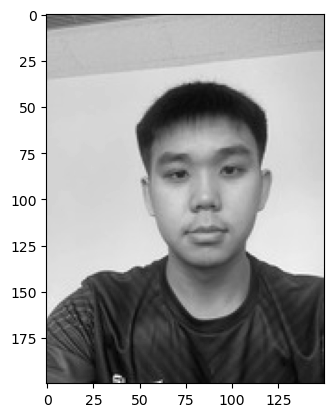

age: 20
gender: 0


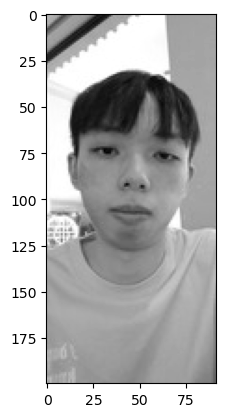

age: 21
gender: 0


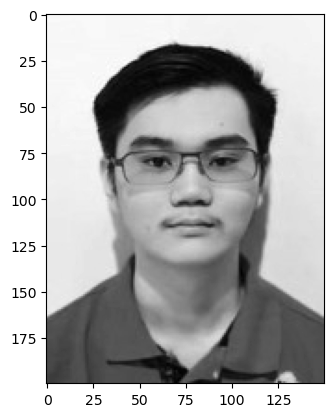

In [38]:
from skimage import io,transform
from skimage.transform import resize
Faces =[]
Ages = []
Genders = []
# Visualize some examples of resize image
for k,i in enumerate(glob.glob(r"C:\Users\wee song\matrix\selfie\*")):
    
    # load image
    imagei = io.imread(i)
    print("age:",os.path.basename(i).split("_")[0])
    print("gender:",os.path.basename(i).split("_")[1]) #male 0, female 1
    Ages.append(os.path.basename(i).split("_")[0])
    Genders.append(os.path.basename(i).split("_")[1])
    
    # Convert to grayscale images
    imagei = color.rgb2gray(imagei)
    
    # Resize image
    #imagei = resize(imagei, (50, 50)).shape
    #image_rescaled = rescale(imagei, 0.25, anti_aliasing=False)
    target_shape = (50, 50)  # Desired shape of the image

    # Resize the image to the target shape
    resized_image = transform.resize(imagei, target_shape)



    # Visualize them
    plt.figure()
    plt.imshow(imagei, cmap='gray')
    plt.show()
    
    
    Faces.append(resized_image.flatten())

In [39]:
S = np.array(Faces).astype(float) #declare variable D as a float type
S_A = np.array(Ages).astype(float)/100 # resize y into 0 ~ 1 

# for gender we can use # x1 = 2*(x - min(x)) / ( max(x) - min(x)) - 1
# where -1 = Male (0 in initial data)
# 1 = Female (1 in initial data)

S_G = 2*(np.array(Genders).astype(float))-1

# Age

In [40]:
Lambda = 50
D = np.hstack([np.ones((x_train.shape[0],1)),x_train])

DTD = np.matmul(D.T, D)

DTD_inv = np.linalg.inv(DTD + Lambda*np.eye(D.shape[1]))

DTD_inv_DT = np.matmul(DTD_inv,D.T)

W_c = np.matmul(DTD_inv_DT,y_train)

y_pred = np.hstack([np.ones((x_train.shape[0],1)),x_train])@W_c

y_pred_lin = np.hstack([np.ones((x_test.shape[0],1)),x_test])@W_c

In [41]:
S_pred = np.hstack([np.ones((S.shape[0],1)),S])

S_p = S_pred@W_c

In [42]:
print("Our age:",S_p)

Our age: [ 0.15211061  0.10706519 -0.05194031]


# Gender

In [43]:
Lambda = 50
D = np.hstack([np.ones((x_train.shape[0],1)),x_train])

DTD = np.matmul(D.T, D)

DTD_inv = np.linalg.inv(DTD + Lambda*np.eye(D.shape[1]))

DTD_inv_DT = np.matmul(DTD_inv,D.T)

W_c = np.matmul(DTD_inv_DT,z_train) 


z_pred = np.hstack([np.ones((x_train.shape[0],1)),x_train])@W_c
    

z_pred_lin = np.hstack([np.ones((x_test.shape[0],1)),x_test])@W_c
    


In [44]:
g = np.hstack([np.ones((S.shape[0],1)),S])@W_c
g_p = np.sign(g)

In [45]:
print("Our gender: ",g_p)

Our gender:  [-1. -1.  1.]


# Conclusion
Because of linear regression without using SVD processed features had the lowest MSE and highest ACC.Therefore we decided to use it for progress our selfie to predict age and gender.

After fitting data into the model,we get a good results for us because there is no exaggerate results to us.Among the result there is only the picture 3 has special result maybe that mean picture 3 had some problem.As the result can show that,linear regression without using SVD is a good implementation

# </a><div style="text-align: center"> ~ THANK YOU ~</a> </div>